<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/06_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Setup

In [1]:
# @title This project requires Python 3.7 or above
import sys

assert sys.version_info >= (3, 7)

Import dependences:

In [2]:
# @title Import dependences
from packaging import version

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1") # It requires Scikit-Learn ≥ 1.0.1

#import libraries for preprocessing
from sklearn.preprocessing import StandardScaler

# Import libraries for ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.cluster import KMeans

#Import libraries for performance measuring
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Import library to split the data
from sklearn.model_selection import train_test_split

In [3]:
# @title Import matplotlib and define the default font sizes:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Data check & preprocessing

In [4]:
# @title Import the dataset
df = pd.read_csv("obesity.csv")

In [5]:
# @title Take a first look at the data
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [6]:
# @title Check some statistics about the dataframe
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.216485,0.003316,0.005211,0.748460,0.026528,0.460445
std,0.500083,6.345968,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,0.498551
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,22.777890,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# @title Check if there are non numeric values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [8]:
# @title Check if there are missing values
df.isna().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

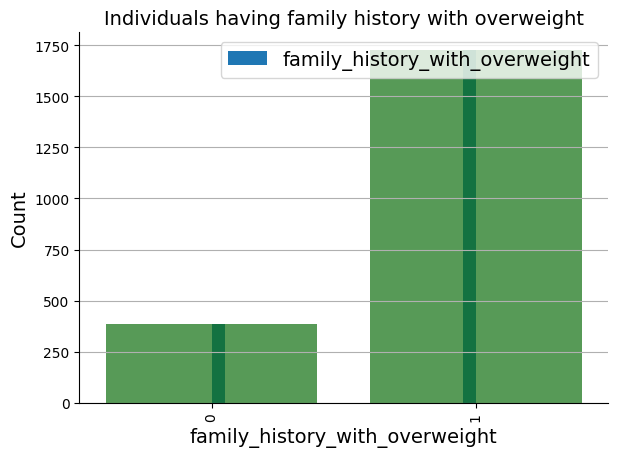

In [9]:
# @title Individuals having family history with overweight

from matplotlib import pyplot as plt
df['family_history_with_overweight'].plot(kind='hist', bins=20, title='family_history_with_overweight')
plt.gca().spines[['top', 'right',]].set_visible(False)

sns.barplot(x=df['family_history_with_overweight'].value_counts().index, y=df['family_history_with_overweight'].value_counts().values, color='green', alpha=0.7)
plt.xlabel('family_history_with_overweight')
plt.ylabel('Count')
plt.title('Individuals having family history with overweight')
plt.grid(axis='y')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

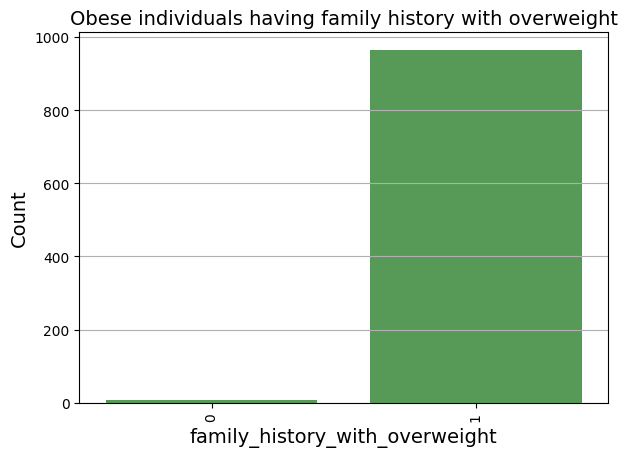

In [10]:
# @title Obese individuals having family history with overweight
df_obese = df[df['NObeyesdad'] == 1] # Filter the DataFrame to include only rows where 'NObeyesdad' equals 1

sns.barplot(x=df_obese['family_history_with_overweight'].value_counts().index, y=df_obese['family_history_with_overweight'].value_counts().values, color='green', alpha=0.7)
plt.xlabel('family_history_with_overweight')
plt.ylabel('Count')
plt.title('Obese individuals having family history with overweight')
plt.grid(axis='y')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

# Based on the plot, most of the obese individuals have family history with overweight.

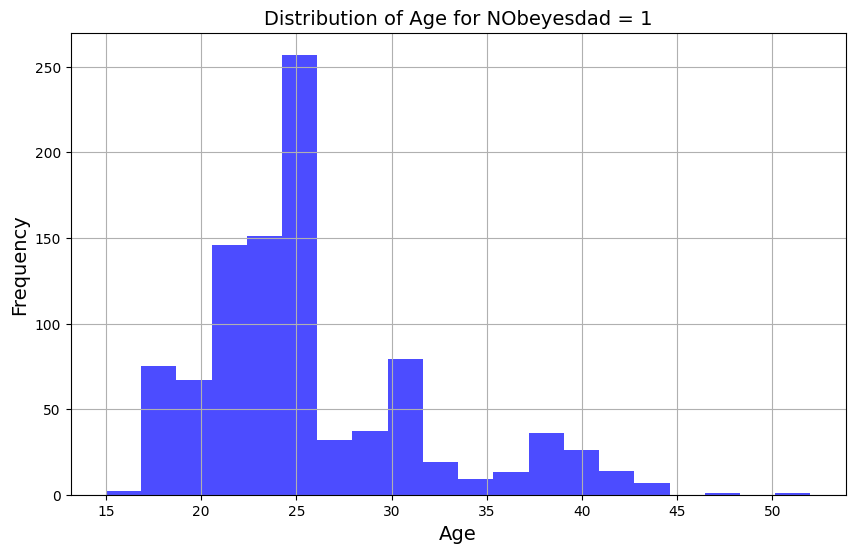

In [11]:
# Filter the DataFrame to include only rows where 'NObeyesdad' equals 1
df_obese = df[df['NObeyesdad'] == 1]

# Plot a histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(df_obese['Age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for NObeyesdad = 1')
plt.grid(True)
plt.show()

# Based on the plot, most of the Obese individuals are arround 25 years old.

# Training and Visualizing a Decision Tree

In [12]:
# @title Split the data to train and test
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Take a look at the vaues

In [13]:
print(y)

[0 0 0 ... 1 1 1]


In [14]:
print(X)
# there is a feature that has different (higher) values.

[[ 0.       21.        1.       ...  0.        1.        0.      ]
 [ 0.       21.        1.       ...  0.        1.        0.      ]
 [ 1.       23.        1.       ...  0.        1.        0.      ]
 ...
 [ 0.       22.524036  1.       ...  0.        1.        0.      ]
 [ 0.       24.361936  1.       ...  0.        1.        0.      ]
 [ 0.       23.664709  1.       ...  0.        1.        0.      ]]


## Apply scale transformation to the values

In [15]:
# To improve the training results, scaling of the features has been applied.
sc = StandardScaler() # Setup the scaler object

In [16]:
X_train = sc.fit_transform(X_train) # Transform the train data
print(X_train) # Take a look at the values

[[-1.01311923 -0.53264595  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [-1.01311923 -0.54423543  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [-1.01311923 -0.23925802  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 ...
 [-1.01311923 -0.22534243  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [-1.01311923 -0.22377429  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [ 0.98705066 -0.68708178  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]]


In [17]:
X_test = sc.transform(X_test) # Transform the test data
print(X_test)  # Take a look at the values

[[-1.01311923 -0.62424632  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [-1.01311923  0.2395332   0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [ 0.98705066 -0.99595344  0.46961161 ... -0.07719764 -1.69456768
  -0.1729054 ]
 ...
 [ 0.98705066 -0.84151761  0.46961161 ... -0.07719764 -1.69456768
  -0.1729054 ]
 [ 0.98705066  0.70071519  0.46961161 ... -0.07719764 -1.69456768
  -0.1729054 ]
 [ 0.98705066 -0.8593009   0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]]


## Create Random forest models

In [18]:
# @title Model 1
randf_1 = RandomForestClassifier(n_estimators=10, max_leaf_nodes=10, criterion = 'gini', random_state=42)
randf_1.fit(X_train, y_train)
y_pred_1 = randf_1.predict(X_test)

In [19]:
# @title Model 2
randf_2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, criterion = 'gini',random_state=42)
randf_2.fit(X_train, y_train)
y_pred_2 = randf_2.predict(X_test)

## Performance Metrics

## Culculate accuracy

In [20]:
# @title Accuracy for model 1
accuracy_model1 = accuracy_score(y_test, y_pred_1)
print(f"Model 1 accuracy:",  round(accuracy_model1*100, 3), '%')


Model 1 accuracy: 85.579 %


In [21]:
# @title Accuracy for model 2
accuracy_model2 = accuracy_score(y_test, y_pred_2)
print(f"Model 2 accuracy:", round(accuracy_model2*100, 3), '%')

Model 2 accuracy: 83.215 %


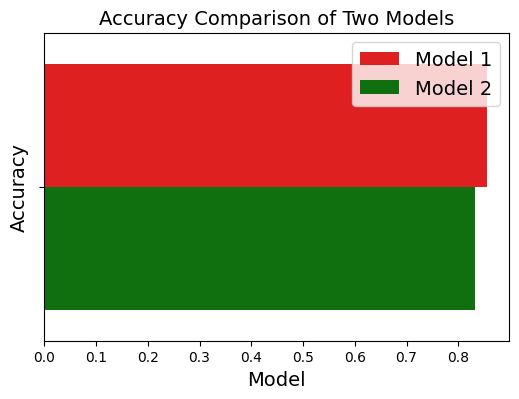

Model 1: 85.579 %
Model 2: 83.215 %


In [22]:
# @title Visualize the accuracy of the models
# Model names
model_names = ['Model 1', 'Model 2']

# Accuracy values
accuracy_values = [accuracy_model1, accuracy_model2]

colors=['red','green']
# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=accuracy_values, hue=model_names, palette=colors, legend=True)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Two Models')

# Show plot
plt.show()
print(f"Model 1:",  round(accuracy_model1*100, 3), '%')
print(f"Model 2:", round(accuracy_model2*100, 3), '%')

## Create Confusion Matrix for each model

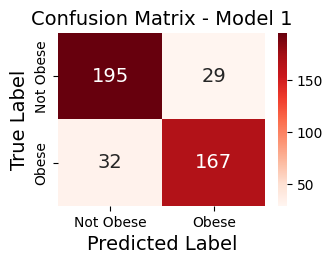

In [23]:
# @title Confusion Matrix for model 1
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

# visualization of Confusion Matrix for model 1
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Obese', 'Obese'], yticklabels=['Not Obese', 'Obese'])
plt.title('Confusion Matrix - Model 1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [24]:
# @title Classification Report for model 1
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       224
           1       0.85      0.84      0.85       199

    accuracy                           0.86       423
   macro avg       0.86      0.85      0.86       423
weighted avg       0.86      0.86      0.86       423



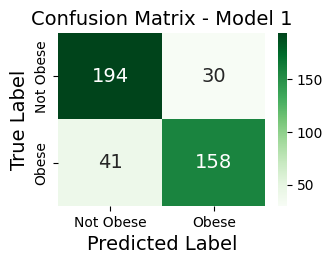

In [25]:
# @title Confusion Matrix for model 2
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

# visualization of Confusion Matrix for model 2
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Obese', 'Obese'], yticklabels=['Not Obese', 'Obese'])
plt.title('Confusion Matrix - Model 1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [26]:
# @title Classification Report for model 2
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       224
           1       0.84      0.79      0.82       199

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.83       423
weighted avg       0.83      0.83      0.83       423



## Model 1 performed better so I check if overfiting

In [27]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

rf_model = RandomForestClassifier(n_estimators=130, max_leaf_nodes=30, criterion='gini', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = randf_1.predict(X_train)
y_test_pred = randf_1.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)


# Print initial model metrics
print("Initial Model Metrics:")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Testing Precision: {test_precision}")
print(f"Training Recall: {train_recall}")
print(f"Testing Recall: {test_recall}")
print(f"Training F1 Score: {train_f1}")
print(f"Testing F1 Score: {test_f1}")

Initial Model Metrics:
Training Accuracy: 0.8584123222748815
Testing Accuracy: 0.8557919621749409
Training Precision: 0.8345864661654135
Testing Precision: 0.8520408163265306
Training Recall: 0.8615782664941786
Testing Recall: 0.8391959798994975
Training F1 Score: 0.8478676002546149
Testing F1 Score: 0.8455696202531645


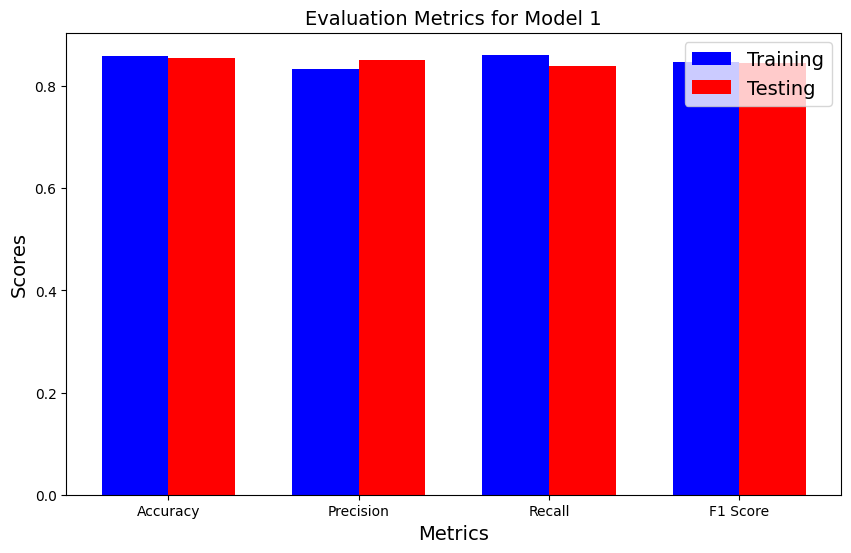

In [28]:
# @title Plot the results
# Define metrics and labels
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
training_scores = [train_accuracy, train_precision, train_recall, train_f1]
testing_scores = [test_accuracy, test_precision, test_recall, test_f1]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

plt.bar(index, training_scores, bar_width, label='Training', color='b')
plt.bar([i + bar_width for i in index], testing_scores, bar_width, label='Testing', color='r')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Model 1')
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend()
plt.show()

Precision-Recall Curve for each model

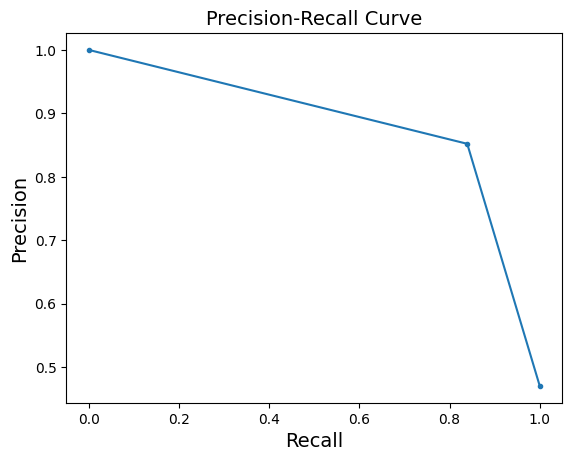

Precision: [0.47044917 0.85204082 1.        ]
Recall: [1.         0.83919598 0.        ]
Threshold: [0 1]


In [29]:
# @title Plot the Precision-Recall curve model 1
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, y_pred_1)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Threshold: {threshold}")

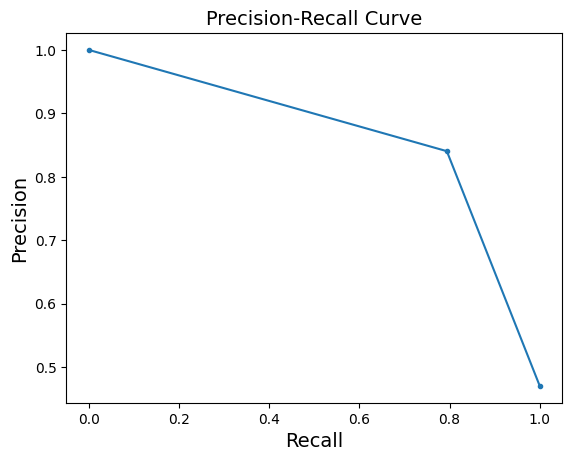

Precision: [0.47044917 0.84042553 1.        ]
Recall: [1.         0.79396985 0.        ]
Threshold: [0 1]


In [30]:
# @title Plot the Precision-Recall curve model 2

precision, recall, threshold = precision_recall_curve(y_test, y_pred_2)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Threshold: {threshold}")

## Cross Validation

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10, 100, 300],  # Number of trees
    'max_depth': [None ,10, 30, 40]    # Maximum depth of each tree
}

# Perform grid search cross-validation
grid_search1 = GridSearchCV(randf_1, param_grid, cv=5)
grid_search1.fit(X_train, y_train)

# Get the best hyperparameters
best_params1 = grid_search1.best_params_
print(best_params1)

{'max_depth': None, 'n_estimators': 300}


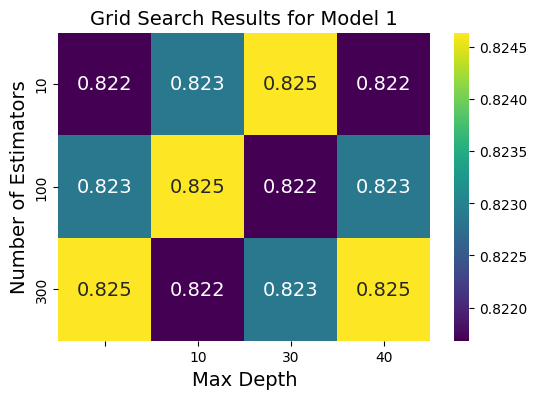

In [32]:
# @title Grid Search Results for Model 1
results1 = grid_search1.cv_results_
n_estimators = len(param_grid['n_estimators'])
max_depth = len(param_grid['max_depth'])
scores1 = np.array(results1['mean_test_score']).reshape(n_estimators, max_depth)

# Create subplots
plt.figure(figsize=(6, 4))

# Plot first heatmap
sns.heatmap(scores1, annot=True, cmap='viridis', fmt='.3f', xticklabels=param_grid['max_depth'], yticklabels=param_grid['n_estimators'])

plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Grid Search Results for Model 1')
plt.show()

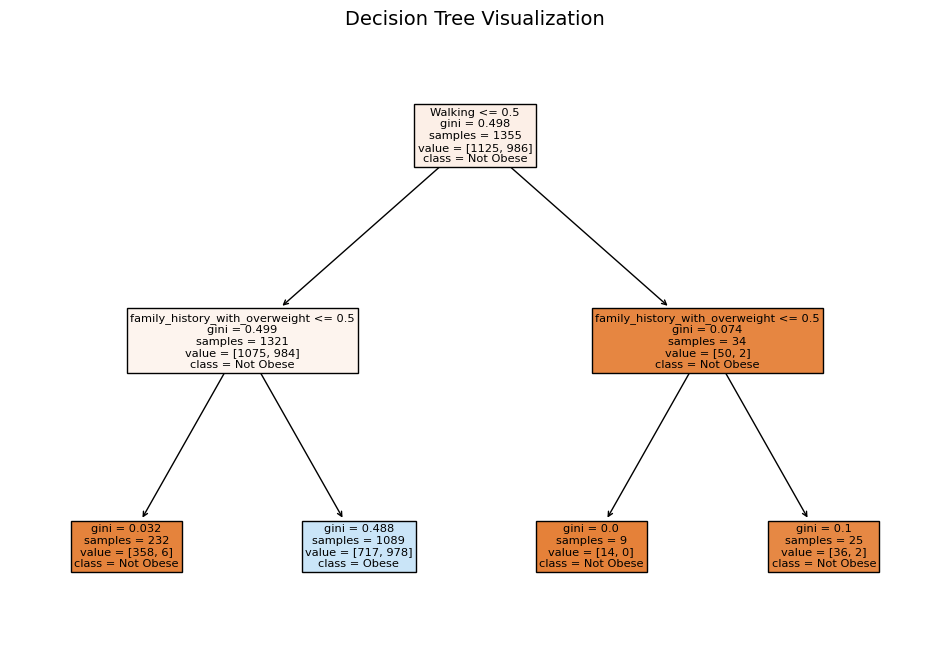

In [33]:
# @title Decision Tree Visualization
# @markdown Visualise the obese individuals having family history with overweight and have primary mode of transportation 'Walking'
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

selected_features = ['family_history_with_overweight', 'Walking']  # selected features

X_subset = df[selected_features]
y = df['NObeyesdad']

rnd_clf = RandomForestClassifier(n_estimators=130, random_state=42)
rnd_clf.fit(X_subset, y)

plt.figure(figsize=(12, 8))
plot_tree(rnd_clf.estimators_[0], feature_names=X_subset.columns.tolist(), class_names=["Not Obese", "Obese"], filled=True)
plt.title('Decision Tree Visualization')
plt.savefig('myTree.png')
plt.show()

## Clustering unsing Kmeans

In [34]:
# @title Take a look at the features
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


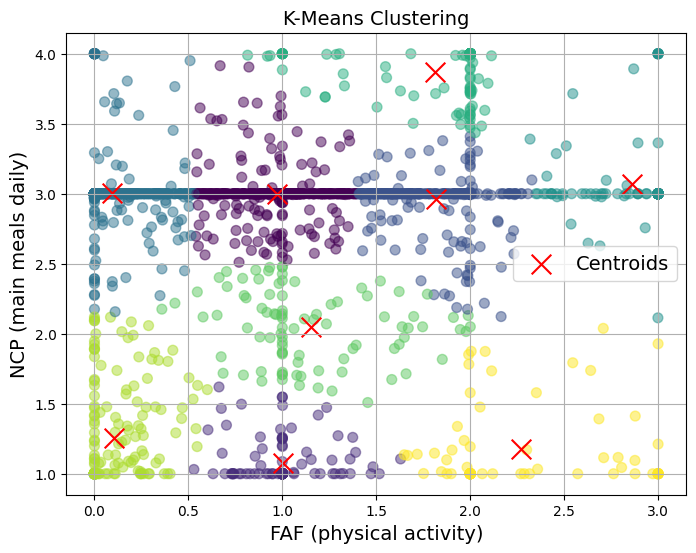

Centers for each of the 9 clusters:
[[0.96970827 2.99721633]
 [1.00391951 1.07538819]
 [1.81524044 2.96309966]
 [0.09253229 3.00721693]
 [2.85988993 3.0672644 ]
 [1.81068196 3.87091411]
 [1.15015944 2.05131511]
 [0.10520683 1.25432648]
 [2.26765904 1.17589328]]


In [35]:
# @title Create the KMeans model
from sklearn.cluster import KMeans
import random

# Assuming df is your DataFrame containing both features and target variable

# Separate features and target variable
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Select features for clustering
features = ['FAF', 'NCP']
X_selected = X[features]

random.seed(10)

# Perform k-means clustering
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans.fit(X_selected)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_selected.values[:, 0], X_selected.values[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('FAF (physical activity)')
plt.ylabel('NCP (main meals daily)')
plt.legend()
plt.grid(True)
plt.show()

print(f'Centers for each of the 9 clusters:')
print(centers)

## Clustering Evaluation

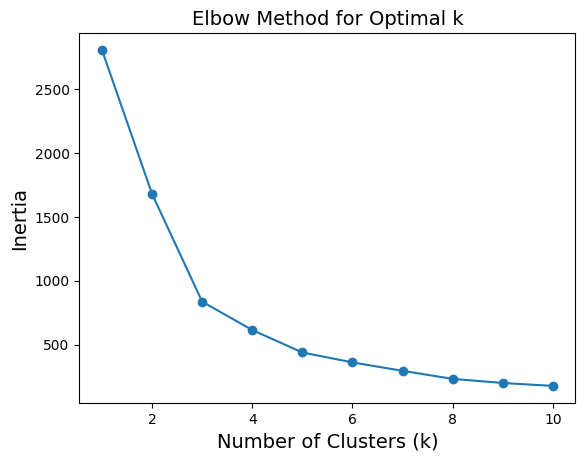

In [36]:
# @title Elbow method was used to find the optimal number of clusters (k)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

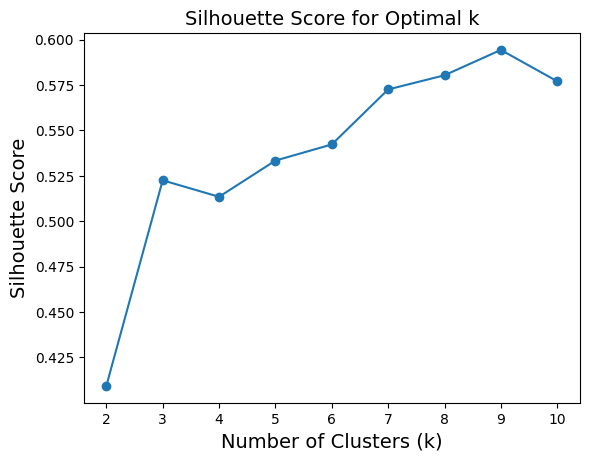

In [37]:
# @title Silhouette score was used to verify the optimal number of clusters (k)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_selected, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The Elbow method showed that the optimal k number is 3 but after the Silhouette score, probably is k=9.

In [38]:
# @title Print the silhouette score and Davies–Bouldin index
from sklearn import metrics

# Predict cluster labels
labels = kmeans.labels_

# Evaluate clustering using silhouette score
silhouette_score = metrics.silhouette_score(X, labels)
print(f"Silhouette Score:{silhouette_score}. We don't have good score in Silhouette Score evaluation.")
print('The value is too close to 0, and that indicates that the object is on or very close to the decision boundary between neighboring clusters.')

# Evaluate clustering using Davies–Bouldin index
davies_bouldin_score = metrics.davies_bouldin_score(X, labels)
print(f"Davies–Bouldin Index:{davies_bouldin_score}. A low Davies–Bouldin index indicates good clustering.")
print('Lower values are indicating tighter clusters with good separation.')
# We have good score in Davies–Bouldin Index evaluation
# A low Davies–Bouldin index indicates good clustering.
# Lower values are indicating tighter clusters with good separation.

Silhouette Score:-0.15782635693535424. We don't have good score in Silhouette Score evaluation.
The value is too close to 0, and that indicates that the object is on or very close to the decision boundary between neighboring clusters.
Davies–Bouldin Index:7.373437770695579. A low Davies–Bouldin index indicates good clustering.
Lower values are indicating tighter clusters with good separation.
